In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv(r"D:\ReNew_Participants_Data\train.csv")
test=pd.read_csv(r"D:\ReNew_Participants_Data\test.csv")

In [3]:
train

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221


In [4]:
train.isnull().sum()

timestamp                                 0
active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
turbine_id                                0
Target                                    0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [6]:
# Convering timestamp as a datetime datatype
train['timestamp']=pd.to_datetime(train['timestamp'])

In [7]:
test['timestamp']=pd.to_datetime(test['timestamp'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   timestamp                               909604 non-null  datetime64[ns]
 1   active_power_calculated_by_converter    909604 non-null  float64       
 2   active_power_raw                        909604 non-null  float64       
 3   ambient_temperature                     909604 non-null  float64       
 4   generator_speed                         909604 non-null  float64       
 5   generator_winding_temp_max              909604 non-null  float64       
 6   grid_power10min_average                 909604 non-null  float64       
 7   nc1_inside_temp                         909604 non-null  float64       
 8   nacelle_temp                            909604 non-null  float64       
 9   reactice_power_calculated_by_converte

In [9]:
train['year']=train['timestamp'].dt.year
train['month']=train['timestamp'].dt.month
train['time']=train['timestamp'].dt.time

In [10]:
test['year']=test['timestamp'].dt.year
test['month']=test['timestamp'].dt.month
test['time']=test['timestamp'].dt.time

In [11]:
test['month']=test.month.astype('object')

In [12]:
train

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,year,month,time
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787,2021,2,20:18:00
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328,2021,4,04:55:00
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236,2021,1,06:26:00
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587,2021,10,03:47:00
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095,2021,3,00:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675,2021,4,19:12:00
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821,2021,2,17:37:00
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486,2021,10,14:18:00
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221,2021,2,22:03:00


In [13]:
train.month.unique()

array([ 2,  4,  1, 10,  3,  5,  8,  7,  6,  9, 11, 12], dtype=int64)

In [14]:
train['month']=train.month.astype('object')

In [15]:
b=[]
for i in range(len(train['time'])):
    a=str(train.iloc[i,18])
    b.append(a[0:2])


In [16]:
train['ntime']=b

In [17]:
b=[]
for i in range(len(test['time'])):
    a=str(test.iloc[i,17])
    b.append(a[0:2])
test['ntime']=b   

In [18]:
test

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,year,month,time,ntime
0,2021-05-06 15:02:00,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14,2021,5,15:02:00,15
1,2021-12-04 06:11:00,472.577255,478.373881,12.306687,965.077563,51.796727,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19,2021,12,06:11:00,06
2,2021-08-31 19:03:00,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14,2021,8,19:03:00,19
3,2021-09-19 19:01:00,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120,2021,9,19:01:00,19
4,2021-04-04 02:21:00,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864277,189.731989,236.053320,261.672180,7.822326,0.561465,Turbine_158,2021,4,02:21:00,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303197,2021-06-15 20:14:00,1754.986613,1797.301392,39.138250,1201.708130,85.610317,1631.455973,38.890467,38.542006,341.591410,404.388580,322.968750,10.402939,1.133143,Turbine_10,2021,6,20:14:00,20
303198,2021-04-17 20:23:00,961.416738,970.462962,33.718848,1194.447693,72.564436,979.040192,33.418560,33.190632,158.035688,186.806035,309.976791,7.312443,0.829828,Turbine_97,2021,4,20:23:00,20
303199,2021-10-16 09:14:00,5.583539,18.309381,29.148418,771.026876,62.844919,114.049692,29.836640,31.198618,56.898274,62.813501,330.593165,3.404537,0.622060,Turbine_120,2021,10,09:14:00,09
303200,2021-12-11 18:55:00,34.711766,26.472111,31.942072,769.952612,63.219437,28.972680,30.332543,31.662434,15.277295,21.483844,133.001864,3.597401,0.252044,Turbine_01,2021,12,18:55:00,18


C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='wind_speed_raw'>

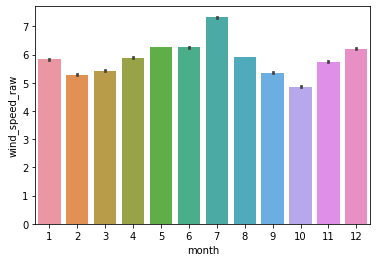

In [19]:
# What is the wind speed acco to different months
sns.barplot(train['month'],train['wind_speed_raw'])

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ntime', ylabel='wind_speed_raw'>

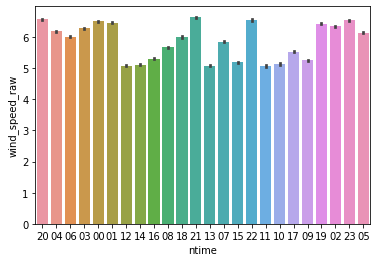

In [20]:
sns.barplot(train.ntime,train.wind_speed_raw)

In [21]:
train['ntime']=train['ntime'].astype('int')
test['ntime']=test['ntime'].astype('int')

In [22]:
# convering time in two categories as we can see wind spped is max at night time
b=[]
for i in train['ntime']:
    if i>=18 or i<=6:
        b.append('Night')
    else:
        b.append('Day')

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ntime', ylabel='wind_speed_raw'>

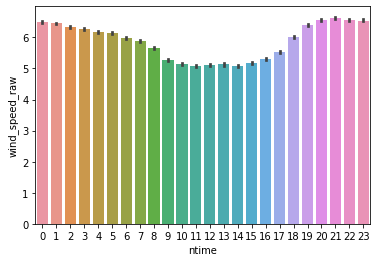

In [23]:
sns.barplot(test.ntime,test.wind_speed_raw)

In [24]:
train['Time']=b
train

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,...,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,year,month,time,ntime,Time
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,...,280.864782,7.057000,0.544082,Turbine_108,47.582787,2021,2,20:18:00,20,Night
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,...,299.552460,5.474937,0.469031,Turbine_18,46.070328,2021,4,04:55:00,4,Night
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,...,84.960106,8.092457,0.622318,Turbine_105,39.989236,2021,1,06:26:00,6,Night
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,...,87.261119,4.071032,0.760719,Turbine_15,46.056587,2021,10,03:47:00,3,Night
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,...,313.724818,6.357943,0.346068,Turbine_01,54.346095,2021,3,00:39:00,0,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,...,189.901812,7.155343,1.028960,Turbine_13,50.768675,2021,4,19:12:00,19,Night
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,...,93.417590,4.121607,0.595874,Turbine_158,44.234821,2021,2,17:37:00,17,Day
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,...,230.988398,8.551669,0.951241,Turbine_15,46.942486,2021,10,14:18:00,14,Day
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,...,65.408801,4.324064,0.247335,Turbine_97,46.392221,2021,2,22:03:00,22,Night


In [25]:
b=[]
for i in test['ntime']:
    if i>=18 or i<=6:
        b.append('Night')
    else:
        b.append('Day')
test['Time']=b

In [26]:
train.year.value_counts()

2021    909604
Name: year, dtype: int64

In [27]:
# the whole data is of 2021 so we drop the year feature
ntr=train.drop(['time','ntime','year','timestamp'],axis=1)
ntr

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,month,Time
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787,2,Night
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328,4,Night
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236,1,Night
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587,10,Night
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095,3,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675,4,Night
909600,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821,2,Day
909601,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486,10,Day
909602,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221,2,Night


In [28]:
test

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,year,month,time,ntime,Time
0,2021-05-06 15:02:00,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14,2021,5,15:02:00,15,Day
1,2021-12-04 06:11:00,472.577255,478.373881,12.306687,965.077563,51.796727,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19,2021,12,06:11:00,6,Night
2,2021-08-31 19:03:00,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14,2021,8,19:03:00,19,Night
3,2021-09-19 19:01:00,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120,2021,9,19:01:00,19,Night
4,2021-04-04 02:21:00,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864277,189.731989,236.053320,261.672180,7.822326,0.561465,Turbine_158,2021,4,02:21:00,2,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303197,2021-06-15 20:14:00,1754.986613,1797.301392,39.138250,1201.708130,85.610317,1631.455973,38.890467,38.542006,341.591410,404.388580,322.968750,10.402939,1.133143,Turbine_10,2021,6,20:14:00,20,Night
303198,2021-04-17 20:23:00,961.416738,970.462962,33.718848,1194.447693,72.564436,979.040192,33.418560,33.190632,158.035688,186.806035,309.976791,7.312443,0.829828,Turbine_97,2021,4,20:23:00,20,Night
303199,2021-10-16 09:14:00,5.583539,18.309381,29.148418,771.026876,62.844919,114.049692,29.836640,31.198618,56.898274,62.813501,330.593165,3.404537,0.622060,Turbine_120,2021,10,09:14:00,9,Day
303200,2021-12-11 18:55:00,34.711766,26.472111,31.942072,769.952612,63.219437,28.972680,30.332543,31.662434,15.277295,21.483844,133.001864,3.597401,0.252044,Turbine_01,2021,12,18:55:00,18,Night


In [29]:
ntest=test.drop(['time','ntime','year','timestamp'],axis=1)

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='wind_speed_raw'>

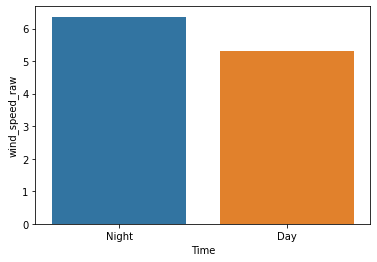

In [30]:
sns.barplot(ntr.Time,ntr.wind_speed_raw)

<AxesSubplot:>

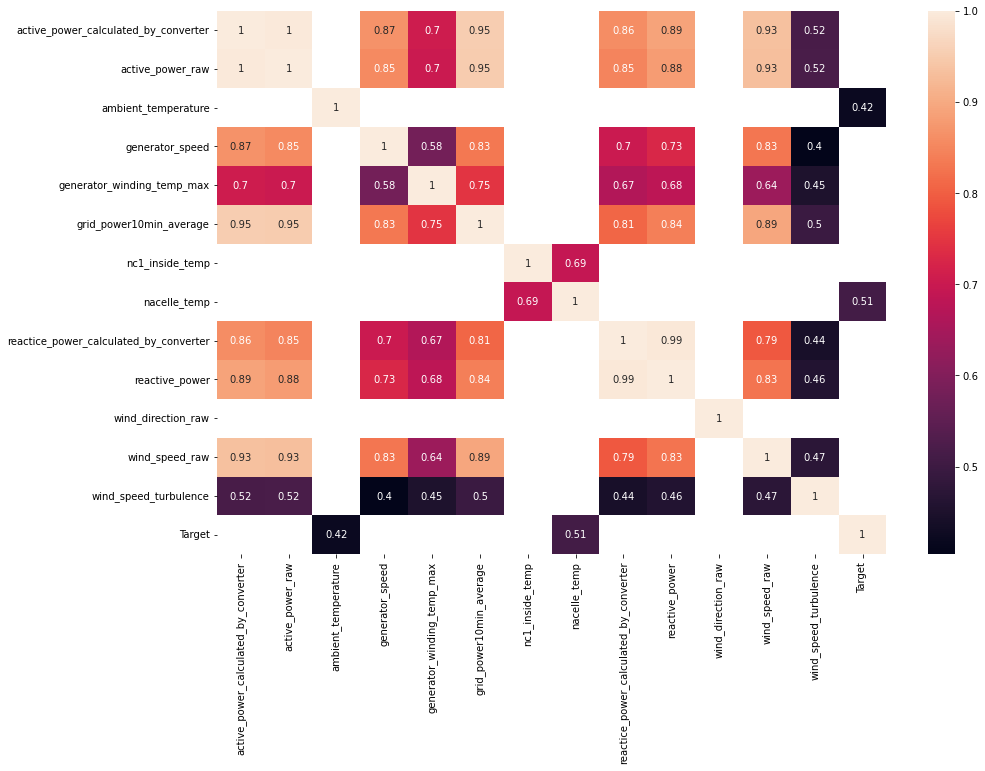

In [31]:
plt.rcParams['figure.figsize']=[15,10]
sns.heatmap(ntr.corr()[ntr.corr()>0.4],annot=True)


In [32]:
ntr

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,month,Time
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787,2,Night
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328,4,Night
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236,1,Night
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587,10,Night
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095,3,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675,4,Night
909600,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821,2,Day
909601,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486,10,Day
909602,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221,2,Night


In [33]:
from scipy import stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 
num=ntr.select_dtypes(np.number)
vif=pd.DataFrame()
vif['Factor']=[variance_inflation_factor(num.values,i) for i in range(num.shape[1])]

In [34]:
# create a column of variable names
vif["Features"] = num.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('Factor', ascending = False).reset_index(drop = True)
# Due to this there is high irregularity in the data this results in large amount of feature loss so we go for non linear model

,Factor,Features
0,429.298008,reactive_power
1,415.177263,active_power_calculated_by_converter
2,364.732872,active_power_raw
3,329.712619,reactice_power_calculated_by_converter
4,285.551946,nacelle_temp
5,275.388887,Target
6,156.569831,generator_winding_temp_max
7,140.040050,nc1_inside_temp
8,97.863791,generator_speed
9,80.652029,wind_speed_raw


In [35]:
# Giving direction according to the degree angle given
n=[]
for i in ntr.wind_direction_raw:
    if i>11.25 and i<=33.25:
        n.append('NNE')
    elif i>33.5 and i<=56.25:
        n.append('NE')
    elif i>56.25 and i<=78.75:
        n.append('ENE')
    elif i>78.75 and i<=101.25:
        n.append('E')
    elif i>101.25 and i<=123.75:
        n.append('ESE')
    elif i>123.25 and i<=146.75:
        n.append('SE')
    elif i>146.75 and i<=168.75:
        n.append('SSE')
    elif i>168.75 and i<=191.25:
        n.append('S')
    elif i>191.25 and i<=213.75:
        n.append('SSW')
    elif i>213.75 and i<=236.25:
        n.append('SW')
    elif i>236.25 and i<=258.75:
        n.append('WSW')
    elif i>258.75 and i<=281.25:
        n.append('W')
    elif i>281.25 and i<=303.75:
        n.append('WNW')
    elif i>303.75 and i<=326.25:
        n.append('NW')
    elif i>326.75 and i<=348.75:
        n.append('NNW')
    else:
        n.append('N')
ntr['Direction']=n

In [36]:
n=[]
for i in ntest.wind_direction_raw:
    if i>11.25 and i<=33.25:
        n.append('NNE')
    elif i>33.5 and i<=56.25:
        n.append('NE')
    elif i>56.25 and i<=78.75:
        n.append('ENE')
    elif i>78.75 and i<=101.25:
        n.append('E')
    elif i>101.25 and i<=123.75:
        n.append('ESE')
    elif i>123.25 and i<=146.75:
        n.append('SE')
    elif i>146.75 and i<=168.75:
        n.append('SSE')
    elif i>168.75 and i<=191.25:
        n.append('S')
    elif i>191.25 and i<=213.75:
        n.append('SSW')
    elif i>213.75 and i<=236.25:
        n.append('SW')
    elif i>236.25 and i<=258.75:
        n.append('WSW')
    elif i>258.75 and i<=281.25:
        n.append('W')
    elif i>281.25 and i<=303.75:
        n.append('WNW')
    elif i>303.75 and i<=326.25:
        n.append('NW')
    elif i>326.75 and i<=348.75:
        n.append('NNW')
    else:
        n.append('N')
ntest['Direction']=n

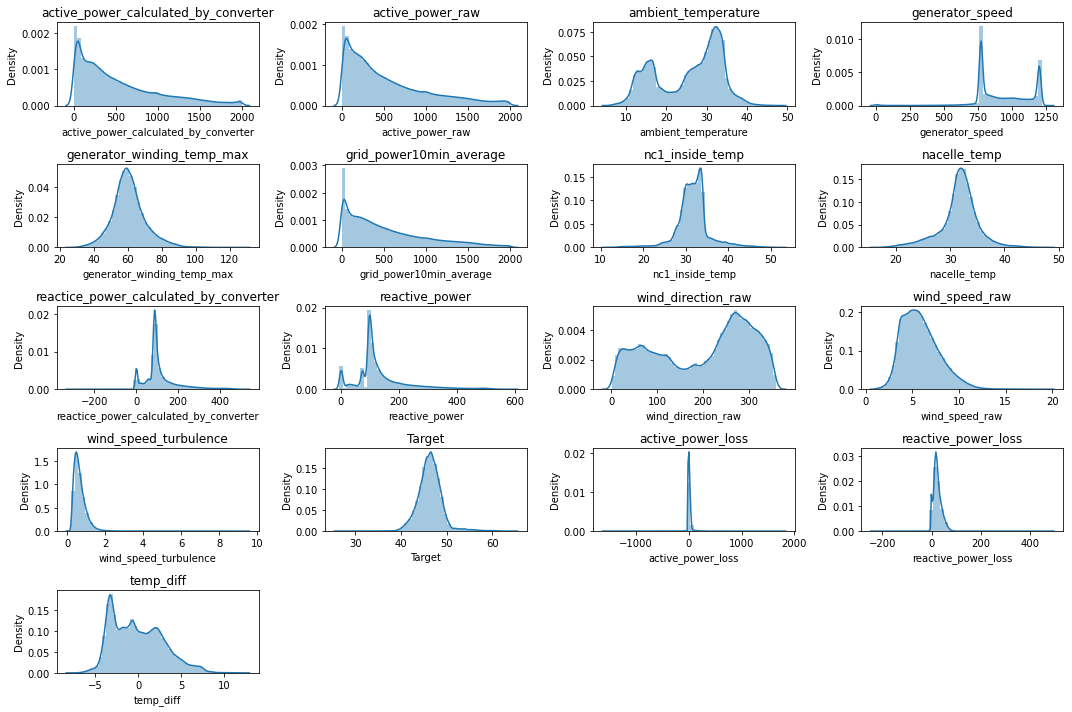

In [49]:
import warnings
warnings.filterwarnings('ignore')
a=5
b=4
c=1
num=ntr.select_dtypes(np.number)
for i in num.columns:
    plt.subplot(a,b,c)
    sns.distplot(ntr.loc[::,i])
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()

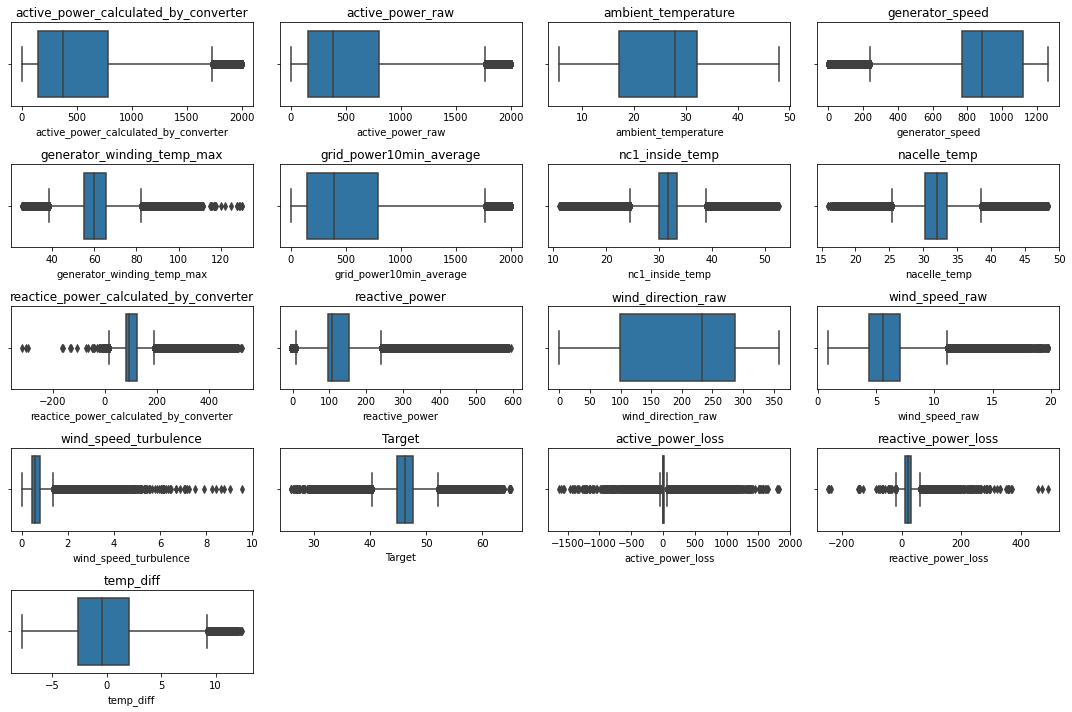

In [50]:
import warnings
warnings.filterwarnings('ignore')
a=5
b=4
c=1
num=ntr.select_dtypes(np.number)
for i in num.columns:
    plt.subplot(a,b,c)
    sns.boxplot(ntr.loc[::,i])
    plt.title(i)
    c=c+1
plt.tight_layout()
plt.show()

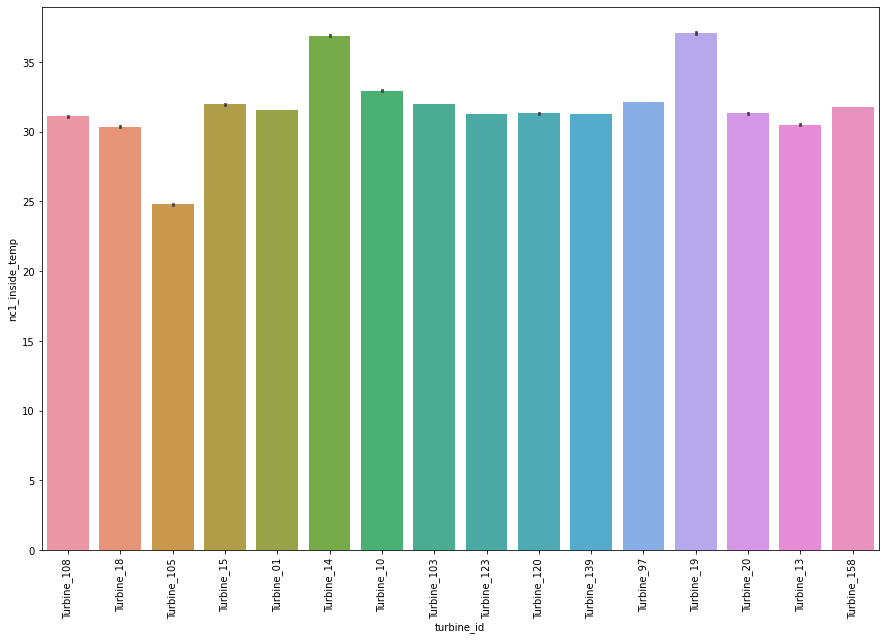

In [51]:
sns.barplot(ntr.turbine_id,ntr.nc1_inside_temp)
plt.xticks(rotation=90)
plt.show()

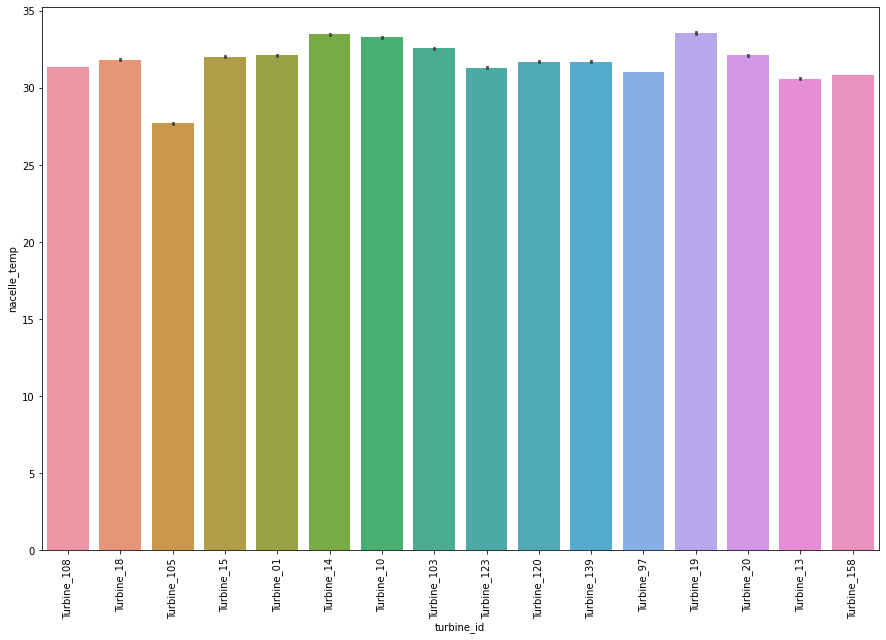

In [52]:
sns.barplot(ntr.turbine_id,ntr.nacelle_temp)
plt.xticks(rotation=90)
plt.show()

In [37]:
ntest

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,month,Time,Direction
0,15.507537,19.956882,40.233264,410.538834,57.357366,84.008399,48.826597,45.363477,2.419202,1.468876,156.399396,2.438629,0.790435,Turbine_14,5,Day,SSE
1,472.577255,478.373881,12.306687,965.077563,51.796727,492.531362,27.457511,24.045565,96.152070,119.378235,56.443802,5.900371,0.544198,Turbine_19,12,Night,ENE
2,447.829615,451.158264,29.106771,948.035899,60.493098,393.151576,39.410553,35.715697,90.251529,117.192635,224.540263,5.924923,0.513481,Turbine_14,8,Night,SW
3,254.014336,249.438965,27.074900,804.963776,55.741899,178.715101,29.476841,31.151895,89.273838,105.086257,182.151426,4.409707,0.448881,Turbine_120,9,Night,S
4,1174.930566,1202.654077,32.148434,1199.754858,67.272313,1115.850317,31.920549,30.864277,189.731989,236.053320,261.672180,7.822326,0.561465,Turbine_158,4,Night,W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303197,1754.986613,1797.301392,39.138250,1201.708130,85.610317,1631.455973,38.890467,38.542006,341.591410,404.388580,322.968750,10.402939,1.133143,Turbine_10,6,Night,NW
303198,961.416738,970.462962,33.718848,1194.447693,72.564436,979.040192,33.418560,33.190632,158.035688,186.806035,309.976791,7.312443,0.829828,Turbine_97,4,Night,NW
303199,5.583539,18.309381,29.148418,771.026876,62.844919,114.049692,29.836640,31.198618,56.898274,62.813501,330.593165,3.404537,0.622060,Turbine_120,10,Day,NNW
303200,34.711766,26.472111,31.942072,769.952612,63.219437,28.972680,30.332543,31.662434,15.277295,21.483844,133.001864,3.597401,0.252044,Turbine_01,12,Night,SE


In [38]:
ntr.turbine_id.unique()

array(['Turbine_108', 'Turbine_18', 'Turbine_105', 'Turbine_15',
       'Turbine_01', 'Turbine_14', 'Turbine_10', 'Turbine_103',
       'Turbine_123', 'Turbine_120', 'Turbine_139', 'Turbine_97',
       'Turbine_19', 'Turbine_20', 'Turbine_13', 'Turbine_158'],
      dtype=object)

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


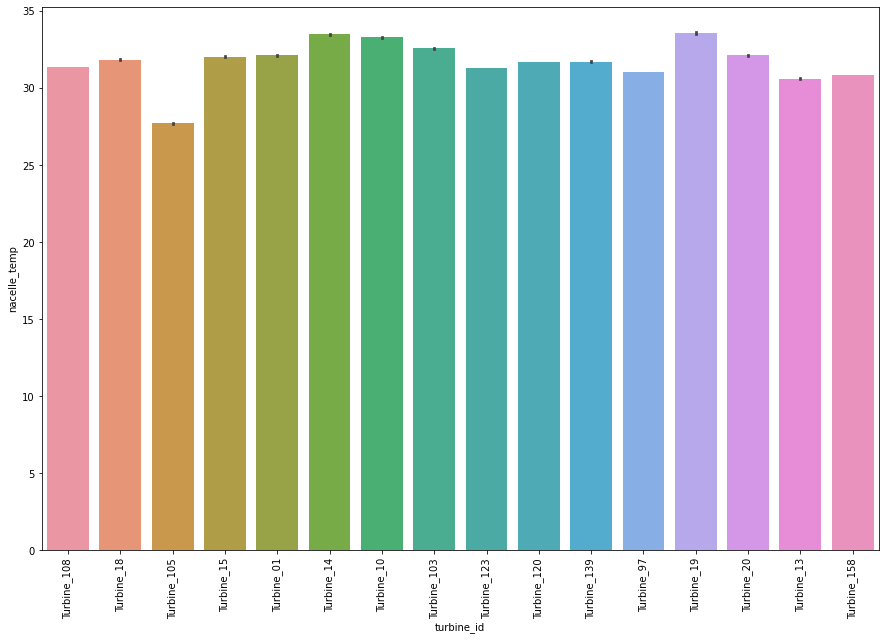

In [39]:
# According to different turbines nachle temperatue
sns.barplot(ntr.turbine_id,ntr.nacelle_temp)
plt.xticks(rotation=90)
plt.show()

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_power_calculated_by_converter', ylabel='Target'>

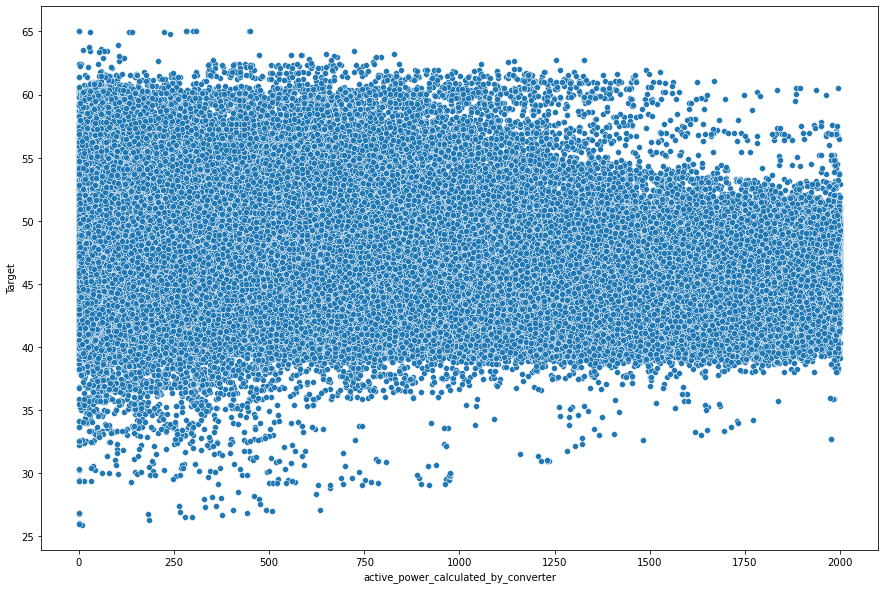

In [40]:
sns.scatterplot(ntr.active_power_calculated_by_converter,ntr.Target)

C:\Users\91882\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_power_raw', ylabel='nacelle_temp'>

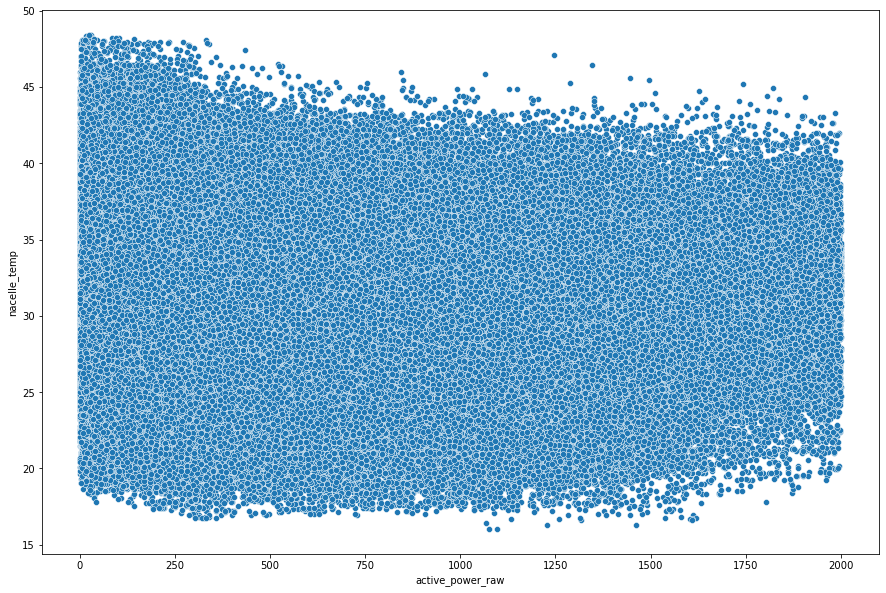

In [41]:
sns.scatterplot(ntr.active_power_raw,ntr.nacelle_temp)
# As active power increases temperature will tends to reduce to such a minor extent

In [42]:
# According to multicoinearity in th data we drop some features which cause data redundancy
mlcntr=ntr.drop(['active_power_raw','active_power_calculated_by_converter','generator_winding_temp_max','generator_speed',
          'reactice_power_calculated_by_converter','wind_speed_raw','nacelle_temp','reactive_power','grid_power10min_average'],axis=1)
mlctest=ntest.drop(['active_power_raw','active_power_calculated_by_converter','generator_winding_temp_max','generator_speed',
          'reactice_power_calculated_by_converter','wind_speed_raw','nacelle_temp','reactive_power','grid_power10min_average'],axis=1)

<AxesSubplot:>

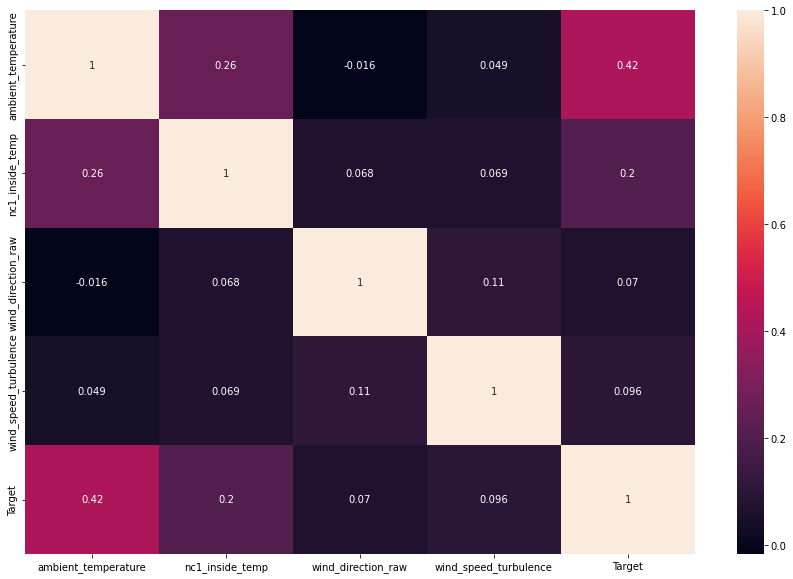

In [43]:
sns.heatmap(mlcntr.corr(),annot=True)

In [44]:
cat=pd.get_dummies(mlctest.select_dtypes('object'))
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num=mlctest.select_dtypes(np.number)
numd=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
xtest=pd.concat([numd,cat],axis=1)
print(xtest.shape)

(303202, 50)


In [45]:
cat=pd.get_dummies(mlcntr.select_dtypes('object'))
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num=mlcntr.select_dtypes(np.number).drop(['Target'],axis=1)
numd=pd.DataFrame(sc.fit_transform(num),columns=num.columns)
xtrain=pd.concat([numd,cat],axis=1)
ytrain=train.Target
print(xtrain.shape,ytrain.shape)

(909604, 50) (909604,)


In [46]:
xtrain

,ambient_temperature,nc1_inside_temp,wind_direction_raw,wind_speed_turbulence,turbine_id_Turbine_01,turbine_id_Turbine_10,turbine_id_Turbine_103,turbine_id_Turbine_105,turbine_id_Turbine_108,turbine_id_Turbine_120,...,Direction_NNW,Direction_NW,Direction_S,Direction_SE,Direction_SSE,Direction_SSW,Direction_SW,Direction_W,Direction_WNW,Direction_WSW
0,0.762613,0.032101,0.777861,-0.339620,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.579807,0.169953,0.956490,-0.575990,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.112127,-5.167951,-1.094725,-0.093217,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.350653,0.635500,-1.072730,0.342674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.740826,0.165343,1.091959,-0.963259,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,0.892409,0.136284,-0.091623,1.187492,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
909600,0.618839,-0.336283,-1.013883,-0.176502,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
909601,0.663773,-0.321647,0.301110,0.942718,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
909602,0.887656,0.148354,-1.281609,-1.274218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
prd=lr.fit(xtrain,ytrain).predict(xtest)
lrsol=pd.DataFrame({'Target':prd})
lrsol.to_csv('lrrenew.csv',index=False)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model=rf.fit(xtrain,ytrain)
rfpred=model.predict(xtest)
lrsol=pd.DataFrame({'Target':rfpred})
lrsol.to_csv('rfrenew.csv',index=False)

In [48]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

In [49]:
mlp=MLPRegressor()
prd=mlp.fit(xtrain,ytrain).predict(xtest)
lrsol=pd.DataFrame({'Target':prd})
lrsol.to_csv('airenew.csv',index=False)

C:\Users\91882\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xgprd=xg.fit(xtrain,ytrain).predict(xtest)
lrsol=pd.DataFrame({'Target':xgprd})
lrsol.to_csv('xgbrenew.csv',index=False)


In [64]:
lrsol=pd.DataFrame({'Target':lgpred})
lrsol.to_csv('lgbrenew.csv',index=False)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb


In [51]:
lr=LinearRegression()
Gbm=GradientBoostingRegressor()
xgb=xgb.XGBRegressor()
lgb=lgb.LGBMRegressor()
mlp=MLPRegressor()
estimator_list=[('Gbm',Gbm),('xgb',xgb),('lgb',lgb)]

In [ ]:
stk=StackingRegressor(estimators=estimator_list,final_estimator=RandomForestRegressor())
stprd=stk.fit(xtrain,ytrain).predict(xtest)

C:\Users\91882\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91882\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91882\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91882\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\91882\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [ ]:
sol=pd.DataFrame({'Target':stkprd})
sol.to_csv('stackrenew.csv',index=False)

In [43]:
ntr.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target', 'month', 'Time', 'Direction',
       'active_power_loss'],
      dtype='object')

In [186]:
# Checking how removal of outliers impact on actual data
q1=ntr.quantile(0.25)
q3=ntr.quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
uper=q3+1.5*iqr
no_outlier=ntr[~((ntr>uper)|(ntr<lower)).any(axis=1)].reset_index(drop=True)

In [188]:
no_outlier

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,...,wind_speed_raw,wind_speed_turbulence,turbine_id,Target,month,Time,Direction,active_power_loss,reactive_power_loss,temp_diff
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,...,7.057000,0.544082,Turbine_108,47.582787,2,Night,W,18.280446,24.043874,-0.377259
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,...,5.474937,0.469031,Turbine_18,46.070328,4,Night,WNW,1.943044,24.648778,0.332065
2,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,...,4.071032,0.760719,Turbine_15,46.056587,10,Night,E,-8.013865,8.806516,-1.590315
3,603.877940,620.637583,28.055220,955.604563,60.882138,697.721731,31.012207,31.054668,57.950467,75.779110,...,6.026029,0.779887,Turbine_15,47.947959,5,Night,SW,16.759644,17.828643,0.042461
4,468.044851,469.828186,17.189911,876.035055,63.952785,675.510671,31.469155,33.117485,87.047708,119.317791,...,4.864594,0.996903,Turbine_103,47.616581,7,Day,S,1.783335,32.270083,1.648330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591562,416.748281,416.255020,32.506697,927.038991,61.528378,353.019704,30.004473,32.241504,94.939171,117.733730,...,5.722023,0.581206,Turbine_108,47.893845,5,Day,E,-0.493261,22.794559,2.237032
591563,102.308385,92.815414,22.041527,769.630778,44.864599,150.804476,33.512226,30.560733,86.925824,98.310251,...,4.705168,0.374873,Turbine_103,46.223015,2,Night,NNE,-9.492971,11.384426,-2.951494
591564,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,...,4.121607,0.595874,Turbine_158,44.234821,2,Day,E,-12.035927,11.268567,-0.502161
591565,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,...,8.551669,0.951241,Turbine_15,46.942486,10,Day,SW,44.100942,31.290963,2.593347


In [192]:
no_outlier.drop(['active_power_calculated_by_converter','reactice_power_calculated_by_converter','turbine_id','nacelle_temp','wind_direction_raw'],axis=1,inplace=True)

In [195]:
no_outlier['month']=no_outlier['month'].astype('object')

In [216]:
# no_outlier.drop(['wind_direction_raw'],axis=1,inplace=True)

In [217]:
print(ntest.shape,no_outlier.shape)

(303202, 15) (591567, 16)


In [237]:
cat=pd.get_dummies(no_outlier.select_dtypes('object'),drop_first=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num=no_outlier.select_dtypes(np.number)
scn=sc.fit_transform(num)
scnum=pd.DataFrame(scn,columns=num.columns)
scnum

,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,reactive_power,wind_speed_raw,wind_speed_turbulence,Target,active_power_loss,reactive_power_loss,temp_diff
0,1.300376,0.779723,1.628461,0.965406,1.512843,0.011617,1.317852,1.109326,-0.194752,0.720049,1.087421,0.386446,-0.109908
1,-0.019238,-1.659931,0.102317,0.006641,0.033757,0.245780,-0.047026,-0.082698,-0.519863,-0.072651,-0.161974,0.443958,0.156806
2,-1.191235,0.350663,-0.948360,-2.831844,-1.316587,1.036576,-1.072481,-1.140488,0.743698,-0.079853,-0.923424,-1.062267,-0.566032
3,0.617145,0.307459,0.279851,0.203537,0.823390,-0.364336,-1.052362,0.332528,0.826731,0.911440,0.971119,-0.204476,0.047911
4,0.136289,-1.102562,-0.246140,0.664774,0.753838,-0.166821,0.097807,-0.542568,1.766823,0.737761,-0.174188,1.168564,0.651737
...,...,...,...,...,...,...,...,...,...,...,...,...,...
591562,-0.034529,0.885139,0.091019,0.300608,-0.256004,-0.799926,0.055961,0.103471,-0.033934,0.883079,-0.348289,0.267666,0.873096
591563,-1.065817,-0.472954,-0.949519,-2.202433,-0.889217,0.716290,-0.457153,-0.662690,-0.927745,0.007374,-1.036538,-0.817169,-1.077851
591564,-1.078956,0.629981,-0.945455,-0.494428,-0.805246,-0.614134,-0.501760,-1.102381,0.029606,-1.034665,-1.231010,-0.828184,-0.156873
591565,2.352900,0.676780,1.700120,0.513087,1.373551,-0.589272,-1.096425,2.235503,1.569018,0.384458,3.062032,1.075473,1.007075


In [238]:
xtrain=pd.concat([scnum,cat],axis=1).drop('Target',axis=1)
ytrain=num.Target
xtrain

,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,reactive_power,wind_speed_raw,wind_speed_turbulence,active_power_loss,...,Direction_NNW,Direction_NW,Direction_S,Direction_SE,Direction_SSE,Direction_SSW,Direction_SW,Direction_W,Direction_WNW,Direction_WSW
0,1.300376,0.779723,1.628461,0.965406,1.512843,0.011617,1.317852,1.109326,-0.194752,1.087421,...,0,0,0,0,0,0,0,1,0,0
1,-0.019238,-1.659931,0.102317,0.006641,0.033757,0.245780,-0.047026,-0.082698,-0.519863,-0.161974,...,0,0,0,0,0,0,0,0,1,0
2,-1.191235,0.350663,-0.948360,-2.831844,-1.316587,1.036576,-1.072481,-1.140488,0.743698,-0.923424,...,0,0,0,0,0,0,0,0,0,0
3,0.617145,0.307459,0.279851,0.203537,0.823390,-0.364336,-1.052362,0.332528,0.826731,0.971119,...,0,0,0,0,0,0,1,0,0,0
4,0.136289,-1.102562,-0.246140,0.664774,0.753838,-0.166821,0.097807,-0.542568,1.766823,-0.174188,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591562,-0.034529,0.885139,0.091019,0.300608,-0.256004,-0.799926,0.055961,0.103471,-0.033934,-0.348289,...,0,0,0,0,0,0,0,0,0,0
591563,-1.065817,-0.472954,-0.949519,-2.202433,-0.889217,0.716290,-0.457153,-0.662690,-0.927745,-1.036538,...,0,0,0,0,0,0,0,0,0,0
591564,-1.078956,0.629981,-0.945455,-0.494428,-0.805246,-0.614134,-0.501760,-1.102381,0.029606,-1.231010,...,0,0,0,0,0,0,0,0,0,0
591565,2.352900,0.676780,1.700120,0.513087,1.373551,-0.589272,-1.096425,2.235503,1.569018,3.062032,...,0,0,0,0,0,0,1,0,0,0


In [236]:
tcat=pd.get_dummies(ntest.select_dtypes('object'),drop_first=True)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
tnum=ntest.select_dtypes(np.number)
tscn=sc.fit_transform(tnum)
stnum=pd.DataFrame(tscn,columns=tnum.columns)
xtest=pd.concat([stnum,tcat],axis=1)
xtest

,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,reactive_power,wind_speed_raw,wind_speed_turbulence,active_power_loss,...,Direction_NNW,Direction_NW,Direction_S,Direction_SE,Direction_SSE,Direction_SSW,Direction_SW,Direction_W,Direction_WNW,Direction_WSW
0,-1.073546,1.826023,-2.688592,-0.349662,-0.940075,4.339310,-1.450404,-1.749529,0.437659,-0.172800,...,0,0,0,0,1,0,0,0,0,0
1,-0.122267,-1.656709,0.175746,-0.922844,-0.074656,-1.094754,-0.156226,0.003748,-0.339581,-0.140296,...,0,0,0,0,0,0,0,0,0,0
2,-0.178743,0.438434,0.087721,-0.026436,-0.285183,1.944852,-0.180216,0.016183,-0.436538,-0.199838,...,0,0,0,0,0,0,1,0,0,0
3,-0.597338,0.185039,-0.651284,-0.516182,-0.739447,-0.581247,-0.313096,-0.751233,-0.640446,-0.390527,...,0,0,1,0,0,0,0,0,0,0
4,1.380715,0.817761,1.387915,0.672354,1.245787,0.040177,1.124404,0.977165,-0.285078,0.388704,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303197,2.614691,1.689463,1.398004,2.562606,2.338050,1.812596,2.972059,2.284174,1.519407,0.740728,...,0,1,0,0,0,0,0,0,0,0
303198,0.898887,1.013608,1.360502,1.217858,0.955968,0.421115,0.583864,0.718923,0.562003,-0.061897,...,0,1,0,0,0,0,0,0,0,0
303199,-1.076964,0.443628,-0.826577,0.215986,-0.876435,-0.489752,-0.777083,-1.260323,-0.093813,0.026876,...,1,0,0,0,0,0,0,0,0,0
303200,-1.060026,0.792026,-0.832126,0.254591,-1.056663,-0.363646,-1.230719,-1.162643,-1.261759,-0.478931,...,0,0,0,1,0,0,0,0,0,0
